<a href="https://colab.research.google.com/github/yaroslavtsepkov/APC/blob/main/bilateral_filter/bilateral_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycuda

     |████████████████████████████████| 1.6MB 9.3MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
  Created wheel for pycuda: filename=pycuda-2020.1-cp36-cp36m-linux_x86_64.whl size=620900 sha256=f8194633c06f0b1acdcd9890e341819b990ea4e74583b4327d640be65e98d149
  Stored in directory: /root/.cache/pip/wheels/8f/78/d1/5bb826f81d9d490297a348d818ff3ee6dd6f2075b06dde6ea0
  Created wheel for pytools: filename=pytools-2020.4.3-py2.py3-none-any.whl size=61374 sha256=e63cee9e9e5bd1c5b1621671ce9b473fb0e0e4ca78e6961cb4d09d69e1e6e87a
  Stored in directory: /root/.cache/pip/wheels/af/c7/81/a22edb90b0b09a880468b2253bb1df8e9f503337ee15432c64
Successfully built pycuda pytools


In [ ]:
import numpy as np
np.random.seed(0) 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import pycuda.autoinit
#import pycuda.driver as drv
#from pycuda.compiler import SourceModule
import time
import cv2


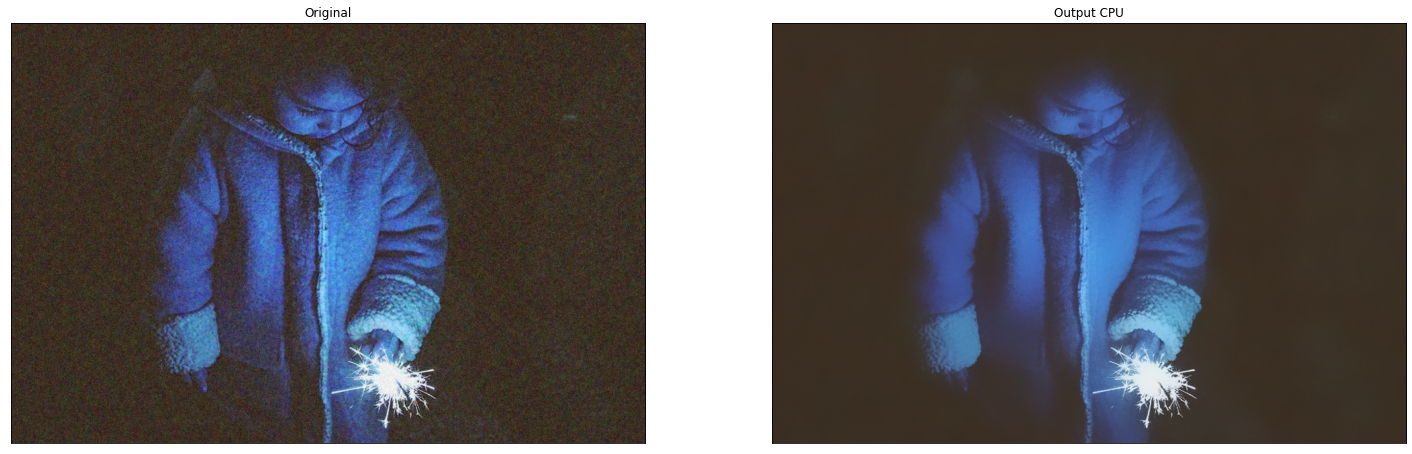

In [ ]:
img = cv2.imread('/content/img.jpeg')
imagesize = range(2, 50, 2)
time_cpu = []
for size in imagesize:
    t = time.time()
    blur = cv2.bilateralFilter(img,size,75,75)
    time_cpu.append(round(time.time() - t, 3))
fig, ax = plt.subplots(1,2, figsize=(25,25))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(blur)
ax[1].set_title('Output CPU')
ax[1].set_xticks([])
ax[1].set_yticks([])
fig.show()

In [ ]:
df = pd.DataFrame(data={
    'imagesize':imagesize,
    'cpu_time': time_cpu
}, )

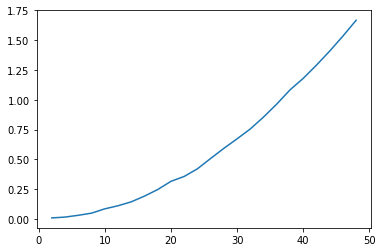

In [ ]:
plt.plot(df['imagesize'], df['cpu_time'])

In [ ]:
src = cv2.cuda_GpuMat()
src.upload(img)
blur = cv2.cuda.bilateralFilter()
dst = apply.blur(src, cv2.cuda_Stream.Null())
result = dst.download()

error: ignored

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(25,25))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(blur)
ax[1].set_title('Output CPU')
ax[1].set_xticks([])
ax[1].set_yticks([])
fig.show()